Método de Euler para resolver ecuaciones diferenciales de primer orden

Solución de un sistema ecuaciones diferenciales mediante el método de Euler de la segunda ley de newton 
(Reducción de orden de la ecuación diferencial de la segunda Ley de Newton mediante la transformación de Legendre)

Método de Euler para un sistema de Ecuación Diferenciales:
v[i] = v[i - 1] + h*(F/m),
x[i] = x[i-1] + h*v[i],
con x(t=0)=x0 y v(t=0)=v0 

Para tres casos: 
1: F= 0 (movimiento rectilíneo uniforme),
2: F= Cte (movimiento rectilíneo acelerado),
3: F= -k(x) (oscilador armónico). 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
def euler(t0, tf, x0, v0, n, caso):
    casos = {"mru" : lambda x, i: 0, 
             "mra" : lambda x, i: 1, 
             "mas" : lambda x, i:-x[i - 1]}
    tiempo, paso_tiempo = np.linspace (t0, tf, n + 1, retstep = True)
    desplazamiento = np.zeros(n + 1)
    velocidad = np.zeros(n+1)
    desplazamiento[0] = x0
    velocidad [0] = v0
    for i in range (1, n+1):
        velocidad[i] = velocidad[i - 1] + paso_tiempo * casos[caso](desplazamiento, i)
        desplazamiento[i] = desplazamiento[i-1] + paso_tiempo * velocidad [i]
    return tiempo, velocidad, desplazamiento

In [66]:
t, v, x = euler (0, 100, 1, 1, 10000, "mru")

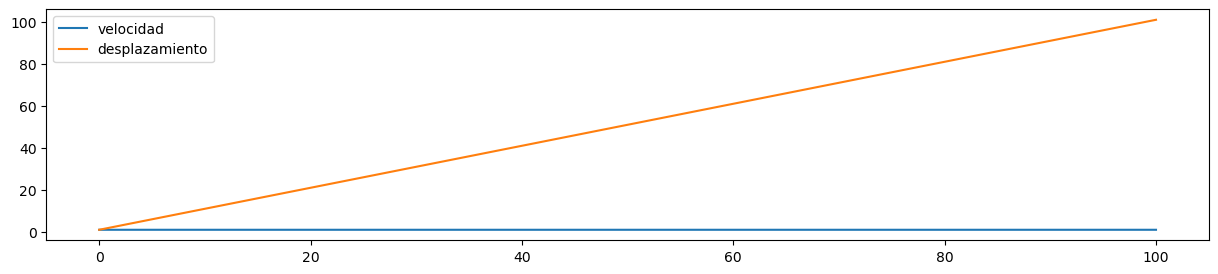

In [67]:
plt.figure(figsize =(15, 3))
plt.plot (t, v, label = "velocidad")
plt.plot (t, x, label = "desplazamiento")
plt.legend (loc = "best")
plt.show()

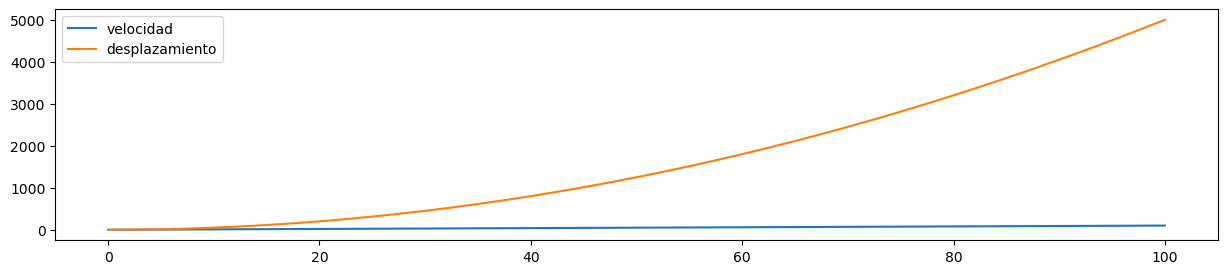

In [68]:
t, v, x = euler (0, 100, 1, 0, 10000, "mra")
plt.figure(figsize =(15, 3))
plt.plot (t, v, label = "velocidad")
plt.plot (t, x, label = "desplazamiento")
plt.legend (loc = "best")
plt.show()

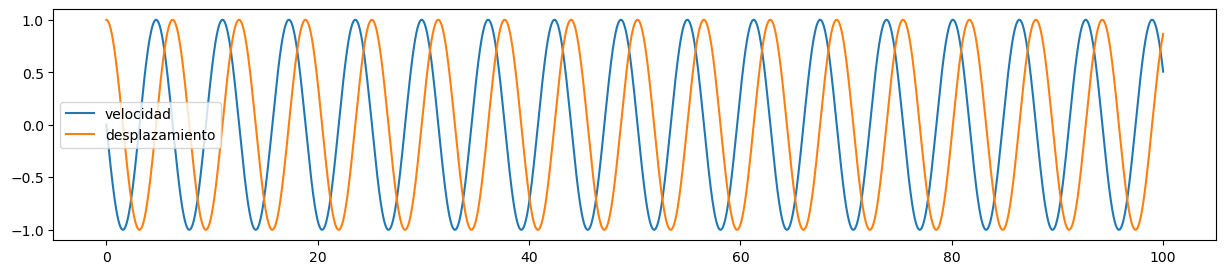

In [69]:
t, v, x = euler (0, 100, 1, 0, 10000, "mas")
plt.figure(figsize =(15, 3))
plt.plot (t, v, label = "velocidad")
plt.plot (t, x, label = "desplazamiento")
plt.legend (loc = "best")
plt.show()

Utilización de Lambda (funciones anónimas)

In [70]:
def euler(t0, tf, x0, v0, n, fuerza):
    tiempo, paso_tiempo = np.linspace (t0, tf, n + 1, retstep = True)
    desplazamiento = np.zeros(n + 1)
    velocidad = np.zeros(n+1)

    desplazamiento[0] = x0
    velocidad [0] = v0

    for i in range (1, n+1):
        velocidad[i] = velocidad[i - 1] + paso_tiempo * fuerza(desplazamiento, i)
        desplazamiento[i] = desplazamiento[i-1] + paso_tiempo * velocidad [i]
    
    return tiempo, velocidad, desplazamiento

In [71]:
fuerza = lambda x, i: -9*x[i-1]
fuerza

<function __main__.<lambda>(x, i)>

In [72]:
t, v, x = euler (0, 100, 1, 0, 10000, fuerza)

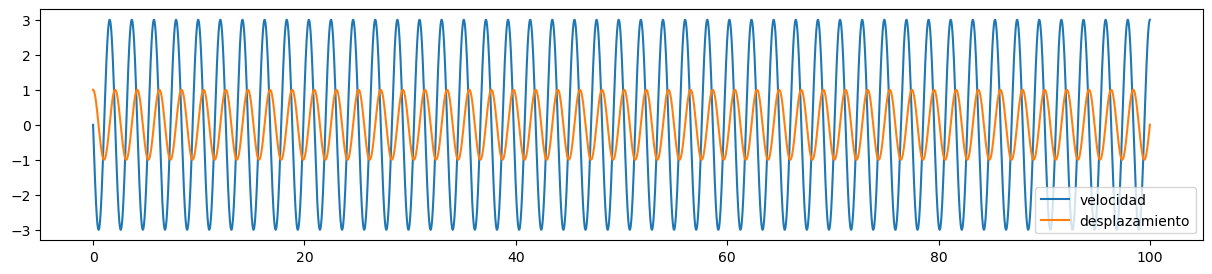

In [73]:
plt.figure(figsize =(15, 3))
plt.plot (t, v, label = "velocidad")
plt.plot (t, x, label = "desplazamiento")
plt.legend (loc = "best")
plt.show()

UTILIZANDO EL MÓDULO SOLVER DE EULER

In [74]:
import euler

In [75]:
fuerza = lambda x, i: -9*x[i-1]
fuerza

<function __main__.<lambda>(x, i)>

In [76]:
t, v, x = euler.solver(0, 5, 1, 0, 10000, fuerza)

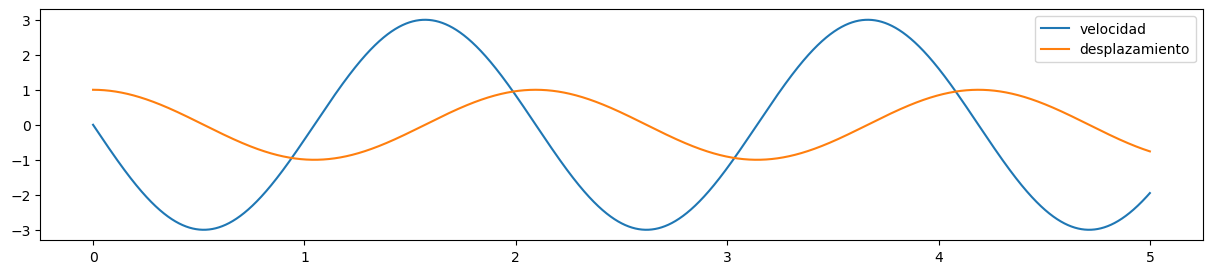

In [77]:
plt.figure(figsize =(15, 3))
plt.plot (t, v, label = "velocidad")
plt.plot (t, x, label = "desplazamiento")
plt.legend (loc = "best")
plt.show()